In [2]:
from knowknow import *
db = Dataset('sociology-wos-74b')

loading variable sociology-wos-74b/groups from disk
loading variable sociology-wos-74b/group_reps from disk
loading variable sociology-wos-74b/_attributes from disk


In [3]:
dfs = {
    key: db.load_variable('%s.births_deaths' % key)
    for key in ['c','fa','ta']
}

loading variable sociology-wos-74b/c.births_deaths from disk
loading variable sociology-wos-74b/fa.births_deaths from disk
loading variable sociology-wos-74b/ta.births_deaths from disk


# uncategorized analysis

In [4]:
births_deaths = require('citation-deaths/births_deaths')

In [5]:
to_check = []

death_in_10 = defaultdict(int)
death0_in_10 = defaultdict(int)
total = defaultdict(int)
total_total_outside = 0
total_total_inside = 0

for x in db.items('c'):
    total_total_outside += 1
    if db(c=x).cits < 5:
        continue
    t = db.trend('c', x)
    
    if t.first > 1990:
        continue
    
    #if sum( t.cits(t.first,t.first+5) ) < 5:
    #    continue
    
    total[ t.first ] += 1
    
    B,D = births_deaths(t, 0.5, 0.3)
    if len(D) and D[0] <= t.first+9:
        death_in_10[ t.first ] += 1;
        
    B,D = births_deaths(t, 0.5, 0.1)
    if len(D) and D[0] <= t.first+9:
        death0_in_10[ t.first ] += 1;
    
    to_check.append(t)
    total_total_inside += 1

loading variable sociology-wos-74b/ind ___ c from disk
loading variable sociology-wos-74b/ind ___ c.fy from disk
loading variable sociology-wos-74b/ind ___ fy from disk


In [6]:
len(to_check)

35412

In [7]:
tc2 = [t for t in to_check if t.first == 1980]

In [8]:
sum(death0_in_10.values())

7647

(0.0, 1.0)

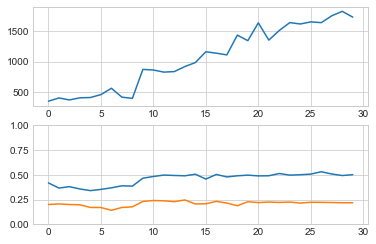

In [9]:
plt.subplot(211)
plt.plot([total[YY] for YY in range(1960,1990)])
#plt.ylim(0,1000)

plt.subplot(212)
plt.plot([death_in_10[YY]/total[YY] for YY in range(1960,1990)])
plt.plot([death0_in_10[YY]/total[YY] for YY in range(1960,1990)])
plt.ylim(0,1)

In [10]:
c2 = death_in_10[1980]/total[1980]

# Original

For cited works, there were only 12 rebirths1.0 to deaths0.1 in this dataset with at least 20 total citations. These 12 are extreme in many ways, having more citations than most, having an extreme death, and finally being reborn. I show these 8 most dramatic rebirths in Figure 2, hoping the reader will know what to make of these peculiarities.

Up to this point I have painted cited works as destined to die. However, this is not true for the 1%, the best of the best. Figure 2 shows in detail how the propensity to dieβ decreases as I consider works which had more citations in this time frame. For cited works in a decade’s top 1%, total annihilation is no longer expected and inevitable. Instead, with reasonable probability their work will last 35 years. 

I define deaths as “remarkable” if they are highly unexpected given a decade of citation records for that work. In Figure 3 these remarkable deaths can be seen as bumps in the tail of death0 and death1. As the number of citations in 1975-1985 increases, the proportion who die0.1 or worse approaches zero. The number of cited works in this range also approaches zero, and in the intersection of these two improbable places to be, highly cited that decade and now dead0.1, are remarkable deaths. By design, there are very few “remarkable deaths” of cited works, but even fewer for cited authors. Of course, no writing author’s death would be very remarkable. 

The examination of remarkable deaths shifts attention from the process of being cited, acquiring followers, and forming institutions to those processes which stop citations from happening. Researchers die, and a dead researcher cannot cite. Programs or journals are defunded. Academic stigma and editorial biases shift over time, making a work uncitable . Or there is no longer ongoing interest in the work’s subject matter among practicing researchers. These processes are interesting in their own right, but also have implications for the meaning of citation counts. Indeed, such influences suggest it should be near impossible to predict citation counts for a given paper without overfitting to a large number of parameters, or similarly without a deep understanding of the academic environment in which these authors are citing. 

Why did these central works die? Were their deaths random, unpredictable, or is there a good explanation? How do their deaths converse with theories of the development of scientific knowledge? What do explanations of these works’ deaths mean for newborn or soon to be born works, or for the bottom 99.9%? I postpone answers to these difficult questions for the moment, and instead simply present these deaths to you for your inspection and interpretation (see Figures 4-7). Observe the remarkable diversity in life-course in the random sample of top 1% authors (Figure 7).

# absolute

Each citation represents some fundamental unit of attention and incorporation into academic discourse and thought. 10 citations per year to a paper represents 10 authors every year who managed to publish such a citation, which in turn represents an institutional space for these authors in proportion to their number. In addition, we do not want to classify authors as "dead," When they're doing as well in absolute numbers as they've always done, they just aren't keeping up with the explosion in published in sociology.

## how likely are works/authors to die?

In [13]:
df = dfs['c']

In [14]:
df.head()

,first,total,maxcount,maxcounty,name,isTop,death0,life1_avg0,rebirth1_5,death1,rebirth1_10,life1_avg1,rebirth3_10,death3,life1_avg3
0,1983,12,2,1991,"Aalen, O.|1978|ann stat,v6,p701",True,-1,0.363636,-1,-1,-1,0.363636,-1,1994,0.818182
1,1985,8,2,1993,"Aaron, H.|painful prescription",True,2005,0.400000,-1,2005,-1,0.400000,-1,1994,0.666667
2,1979,10,2,1990,"Aaron, H.|politics professors",True,1998,0.473684,-1,1998,-1,0.473684,-1,1992,0.615385
3,1978,6,2,1985,"Aaron, H.|studies ec income ma",True,1989,0.545455,-1,1989,-1,0.545455,-1,1988,0.500000
4,1980,6,2,1980,"Aaron, H.|who pays property ta",True,2002,0.272727,-1,2002,-1,0.272727,-1,1986,0.666667


In [15]:
args = [
    ('c', 'cited works'),
    ('ta', 'cited authors'),
    ('fa', 'citing authors'),
]

In [16]:
df.shape

(45335, 15)

In [17]:
df.head()

,first,total,maxcount,maxcounty,name,isTop,death0,life1_avg0,rebirth1_5,death1,rebirth1_10,life1_avg1,rebirth3_10,death3,life1_avg3
0,1983,12,2,1991,"Aalen, O.|1978|ann stat,v6,p701",True,-1,0.363636,-1,-1,-1,0.363636,-1,1994,0.818182
1,1985,8,2,1993,"Aaron, H.|painful prescription",True,2005,0.400000,-1,2005,-1,0.400000,-1,1994,0.666667
2,1979,10,2,1990,"Aaron, H.|politics professors",True,1998,0.473684,-1,1998,-1,0.473684,-1,1992,0.615385
3,1978,6,2,1985,"Aaron, H.|studies ec income ma",True,1989,0.545455,-1,1989,-1,0.545455,-1,1988,0.500000
4,1980,6,2,1980,"Aaron, H.|who pays property ta",True,2002,0.272727,-1,2002,-1,0.272727,-1,1986,0.666667


In [18]:
strin = ""
for typ, name in args:
    df = dfs[typ]
    #print(df.shape)
    #print(df.head())
    
    n1 = df.shape[0]
    n3 = df[df.death3>0].shape[0] / n1
    n4 = df[df.death1>0].shape[0] / n1
    n5 = df[df.death0>0].shape[0] / n1

    strin += """Of the {n1:,} {name} whose first citation was before 1995, 
        {n3:0.0%} have died (β = 0.3),
        {n4:0.0%} have died (β = 0.1),
        and {n5:0.0%} have had a total academic death (β = 0).  """.format(**locals())
    
display(Markdown(strin))

Of the 45,335 cited works whose first citation was before 1995, 
        77% have died (β = 0.3),
        58% have died (β = 0.1),
        and 56% have had a total academic death (β = 0).  Of the 17,181 cited authors whose first citation was before 1995, 
        59% have died (β = 0.3),
        42% have died (β = 0.1),
        and 39% have had a total academic death (β = 0).  Of the 21,309 citing authors whose first citation was before 1995, 
        95% have died (β = 0.3),
        93% have died (β = 0.1),
        and 91% have had a total academic death (β = 0).  

In [19]:
strin = ""
for typ, name in args:
    df = dfs[typ]
    df = df[df['first'] == 1980]

    n1 = df.shape[0]
    n3 = df[df.death3>0].shape[0] / n1
    n4 = df[df.death1>0].shape[0] / n1
    n5 = df[df.death0>0].shape[0] / n1

    strin += """Of the {n1:,} {name} whose first citation was in 1980, 
        {n3:0.0%} have died (β = 0.3),
        {n4:0.0%} have died (β = 0.1),
        and {n5:0.0%} have had a total academic death (β = 0). """.format(**locals())
    
display(Markdown(strin))

Of the 1,640 cited works whose first citation was in 1980, 
        88% have died (β = 0.3),
        73% have died (β = 0.1),
        and 69% have had a total academic death (β = 0). Of the 680 cited authors whose first citation was in 1980, 
        68% have died (β = 0.3),
        50% have died (β = 0.1),
        and 47% have had a total academic death (β = 0). Of the 737 citing authors whose first citation was in 1980, 
        97% have died (β = 0.3),
        94% have died (β = 0.1),
        and 93% have had a total academic death (β = 0). 

In [20]:
df

,first,total,maxcount,maxcounty,name,isTop,death0,life1_avg0,rebirth1_5,death1,rebirth1_10,life1_avg1,rebirth3_10,death3,life1_avg3
19,1980,37,17,1980,"abel, r",False,1996,2.312500,-1,1996,-1,2.312500,-1,1985,3.400000
25,1980,41,30,1982,"abell, t",False,1985,8.200000,-1,1985,-1,8.200000,-1,1985,8.200000
67,1980,152,42,1981,"acker, s",True,1996,9.000000,-1,1996,-1,9.000000,-1,1985,15.800000
71,1980,27,16,2014,"ackerman, s",False,1985,1.600000,2005,1985,2005,1.600000,2005,1985,1.600000
92,1980,12,8,2001,"adams, d",False,1987,0.428571,1997,1987,1997,0.428571,1997,1987,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21145,1980,13,13,1980,"zamami, m",False,1985,2.600000,-1,1985,-1,2.600000,-1,1985,2.600000
21150,1980,142,49,1983,"zaret, d",True,1993,10.923077,-1,1990,-1,13.800000,-1,1985,18.800000
21152,1980,17,12,1980,"zaslavsky, v",False,1985,3.400000,-1,1985,-1,3.400000,-1,1985,3.400000
21262,1980,23,12,1980,"zito, g",False,1985,4.600000,-1,1985,-1,4.600000,-1,1985,4.600000


# proportional

## how likely are works/authors to die?